# Problem 1

## Part 1a

The heat equation in 1D is given with the initial and boundary conditions as:

$$
\left\{
\begin{array}{ll}
\frac{\partial u}{\partial t} - k \frac{\partial^2}{\partial x^2} u = 0 & \forall x\,\in\,(0, L)\; \forall t \in (0,T)\\
u(x, 0) = m(x) & \forall x \in [0,L] \\
u(0,t) = u(L,t) = 0 & \forall t \in (0, T],
\end{array}
\right.
$$

Solving via separation of variables: $u = \phi(x)\psi(t)$.

\begin{equation}
\phi(x)\psi'(t) - k\psi(t)\phi''(x) = 0
\end{equation}
\begin{equation}
\frac{\phi''(x)}{\phi(x)} = \frac{1}{k}\frac{\psi'(t)}{\psi(t)} = -\lambda
\end{equation}

Given the boundary conditions the spatial solution is:

\begin{equation}
\phi(x) = B_n \sin\left(\frac{n\pi}{L}x\right)
\end{equation}

and the temporal solution: 

\begin{equation}
\psi(t) = C_n e^{ -k\left(n\, \frac{\pi}{L} \right)^2 t}
\end{equation}

So then:

\begin{equation}
u(x,t) = A_n e^{ -k\left(n\, \frac{\pi}{L} \right)^2 t} \sin\left(n\,\frac{\pi}{L} x \right)
\end{equation}

The initial condition:

\begin{equation}
m(x) = u(x,0) = A_n\sin\left(n\,\frac{\pi}{L} x \right)
\end{equation}

\begin{equation}
\int_0^L m(x)\sin\left(j\,\frac{\pi}{L} x \right) \, dx = A_n \int_0^L \sin\left(n\,\frac{\pi}{L} x \right)\sin\left(j\,\frac{\pi}{L} x \right) \, dx
\end{equation}

Since the eigenfunctions are orthogonal ... 

\begin{equation}
A_n = \frac{2}{L}\int_0^Lm(x)\sin\left(j\,\frac{\pi}{L} x \right) \, dx
\end{equation}

Plugging this into the equation for $u(x,t)$ gives

\begin{equation}
u(x,t) = \sqrt{\frac{L}{2}}\sin\left(n\,\frac{\pi}{L} x \right)e^{ -k\left(n\, \frac{\pi}{L} \right)^2 t}
\end{equation}

which confirms the desired result.

## Part 1b

The eigenfunctions do not change. The eigenvalues change as follows:

$$ \mathbf{K} \mathbf{u}_n = \mu_n\mathbf{u}_n$$
$$ \Delta t\mathbf{K} \mathbf{u}_n = \Delta t \mu_n\mathbf{u}_n$$
$$ \left( \mathbf{I} + \mathbf{K} \mathbf{u}_n \right) = (1 + \Delta t \mu_n)\mathbf{u}_n $$

For the inverse, we just take the reciprocal of the eigenvalue: 

$$ \left( \mathbf{I} + \Delta t \mathbf{K} \right)^{-1} \mathbf{u}_n = (1 + \Delta t \mu_n)^{-1} \mathbf{u}_n $$

Doing this $n_t$ times ... 

$$ \left( \mathbf{I} + \Delta t \mathbf{K} \right)^{-n_t} \mathbf{u}_n = (1 + \Delta t \mu_n)^{-n_t} \mathbf{u}_n $$

so the eigenvalues and eigenfunctions of $\mathbf{F}$ are: 

$$ (1 + \Delta t \mu_n)^{-n_t} $$
$$ \mathbf{u}_n $$

## Part C

#### Code and problem setup

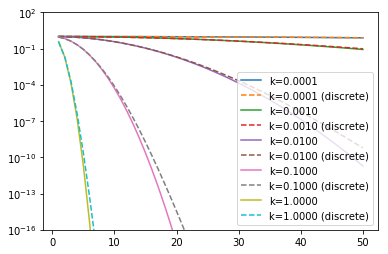

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Set up the problem
T = 0.1
L = 1.0

nx = 200
nt = 100

h = L/float(nx+1)
dt = T/float(nt)

k = np.array((0.0001,0.001,0.01,0.1,1.0))
x = np.linspace(0.+h, L-h, nx-1) 
n = np.arange(1,nx)

# --- Compute the eigenvalues
disc_eigs = np.zeros((k.shape[0],nx-1))
cont_eigs = np.zeros_like(disc_eigs)

plt.figure
leg=[]

for i in np.arange(k.shape[0]):
    cont_eigs[i,:] = np.exp(-k[i]*T * np.power(n * np.pi /L,2))
    disc_eigs[i,:] = k[i]*4/(h**2) * np.sin(np.pi*n / (2*nx))**2
    disc_eigs[i,:] = np.power(1 + dt*disc_eigs[i,:],-nt)
    plt.semilogy(n[0:50],cont_eigs[i,0:50])
    plt.semilogy(n[0:50],disc_eigs[i,0:50],'--')        
    leg.append('k=%1.4f' % k[i])
    leg.append('k=%1.4f (discrete)' %k[i])
    
plt.legend(leg,loc='lower right')
plt.ylim(pow(10,-16),pow(10,2))
plt.show()

#### Discrete -vs- continuous eigenvalues

The above plot shows discrete and continuous eigenvalues for the inverse operator. The values drop below machine precision rapidly, and at an increasing rate with $k$. The discrete spectrum closely mirrors the behavior of the continuous spectrum counter part, but decays at a slightly slower rate.

## Part D

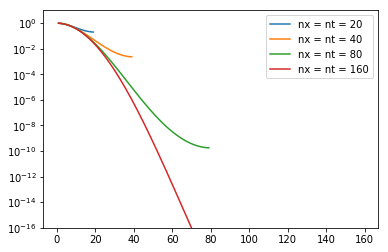

In [2]:
L = 1.0
T = 0.1
k = 0.01
nx = np.array((20,40,80,160))
nt = np.copy(nx)

plt.figure
leg=[]

for i in np.arange(nx.shape[0]):
    n = np.arange(1,nx[i])
    h = L/float(nx[i]+1)
    dt = T/float(nt[i]+1)
    disc_eigs = k*4/(h**2) * (np.sin(np.pi*n / (2*nx[i]))**2)
    disc_eigs = np.power(1+dt*disc_eigs,-nt[i])
    plt.semilogy(n,disc_eigs)
    leg.append('nx = nt = %d' % nx[i])
    
plt.legend(leg)
plt.ylim((pow(10,-16),pow(10,1)))
plt.show()

#### Increasing resolution

The above plot shows the effect of increasing resolution in space and time. With increasing resolution, the eigenvalues decay much more rapidly.

# Problem 2

## Routines and problem set up

In [43]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as la
import matplotlib.pyplot as plt
    
def assembleMatrix(n):
    diagonals = np.zeros((3, n))   # 3 diagonals
    diagonals[0,:] = -1.0/h**2
    diagonals[1,:] =  2.0/h**2
    diagonals[2,:] = -1.0/h**2
    K = k*sp.spdiags(diagonals, [-1,0,1], n,n)
    M = sp.spdiags(np.ones(n), 0, n,n)
    
    return M + dt*K
    

def solveFwd(m):
    A = assembleMatrix(m.shape[0])
    u_old = m.copy()
    for i in np.arange(nt):
        u = la.spsolve(A, u_old)
        u_old[:] = u
        
    return u        

def computeEigendecomposition(n):
    ## Compute F as a dense matrix
    F = np.zeros((n,n))
    m_i = np.zeros(n)
    
    for i in np.arange(n):
        m_i[i] = 1.0
        F[:,i] = solveFwd(m_i)
        m_i[i] = 0.0
    
    ## solve the eigenvalue problem
    lmbda, U = np.linalg.eigh(F)
    ## sort eigenpairs in decreasing order
    lmbda[:] = lmbda[::-1]
    lmbda[lmbda < 0.] = 0.0
    U[:] = U[:,::-1]
    
    return lmbda, U 


# --- Problem setup
T = 0.1
L = 1.0
k = 0.01

nx = 200
nt = 100

h = L/float(nx+1)
dt = T/float(nt)

# --- The noise
noise_std_dev = 1e-2

# --- Compute true soln & data
x = np.arange(1,nx,dtype='float64')*h
m_true = np.maximum( np.zeros_like(x), 1. - np.abs(1. - 4.*x)) \
         + 100.*np.power(x,10)*np.power(1.-x,2)
u_true = solveFwd(m_true)
noise = np.random.normal(0,noise_std_dev,u_true.shape[0])
d = u_true + noise

# --- Compute eigenvector and eigenvalues of the discretized forward operator
lmbda, U = computeEigendecomposition(nx-1)

#### Parts (a) & (b)

Here $m_{tsvd}$ and $m_{tikh}$ are computed for the given range: $\alpha$ = {$10^{-4},10^{-3},10^{-2},10^{-1}$}. The solution is shown for each $\alpha$ value.

In [44]:
# --- Set alpha and m_* containers
alpha = np.array((.0001,.001,.01,.1,1))
m_tsvd = np.zeros((alpha.shape[0],lmbda.shape[0]))
m_tikh = np.zeros_like(m_tsvd)

# --- Compute TSVD and Tikh sol
for i in np.arange(alpha.shape[0]):
    lmbda_inv = np.zeros_like(lmbda)
    lmbda_inv[lmbda >= np.sqrt(alpha[i])] = lmbda[lmbda >= np.sqrt(alpha[i])]**(-1)
    m_tsvd[i,:] = np.dot(U, lmbda_inv*np.dot(U.T, d))

    den = lmbda*lmbda+alpha[i]
    m_tikh[i,:] = np.dot(U, (lmbda/den)*np.dot(U.T, d))

## Part A - TSVD 

The initial condition for computed with the truncated singular value decomposition is shown

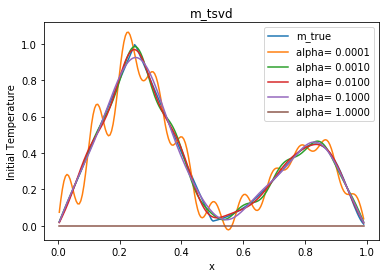

In [45]:
# --- TSVD
plt.figure
leg=['m_true']
plt.plot(x,m_true, label = 'm_true')

for i in np.arange(alpha.shape[0]):
    plt.plot(x,m_tsvd[i,:])
    leg.append('alpha= %1.4f' % alpha[i])
    
plt.title("m_tsvd")
plt.legend(leg)
plt.xlabel('x')
plt.ylabel('Initial Temperature')
plt.show()

## Part B - Tikhonov filter

The initial condition from the Tikhonov filter is shown. 

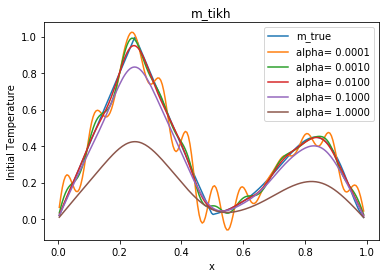

In [46]:
# --- TSVD
plt.figure
plt.plot(x,m_true, label = 'm_true')

for i in np.arange(alpha.shape[0]):
    plt.plot(x,m_tikh[i,:])
    
plt.title("m_tikh")
plt.legend(leg)
plt.xlabel('x')
plt.ylabel('Initial Temperature')
plt.show()

## Part (C)

To compute the L-Curve, I have zoomed in on the region $\alpha < 10^{-1}$. 

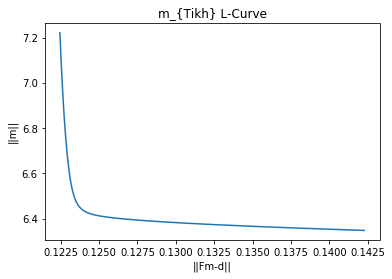

In [47]:
# --- Set alpha and m_* containers
alpha = np.concatenate((np.linspace(.00001,.0001,100), \
                  np.linspace(.0001,.001,100)))
alpha = np.concatenate((alpha, np.linspace(.001,.01,100)))
alpha = np.concatenate((alpha, np.linspace(.01,.1,100)))

m_tsvd = np.zeros((alpha.shape[0],lmbda.shape[0]))
m_tikh = np.zeros_like(m_tsvd)

# --- Compute TSVD and Tikh sol
for i in np.arange(alpha.shape[0]):
    lmbda_inv = np.zeros_like(lmbda)
    lmbda_inv[lmbda >= np.sqrt(alpha[i])] = lmbda[lmbda >= np.sqrt(alpha[i])]**(-1)
    m_tsvd[i,:] = np.dot(U, lmbda_inv*np.dot(U.T, d))

    den = lmbda*lmbda+alpha[i]
    m_tikh[i,:] = np.dot(U, (lmbda/den)*np.dot(U.T, d))
    
# --- L-Curve Plot
reg = np.zeros_like(alpha)
misfit = np.zeros_like(alpha)

for i in np.arange(reg.shape[0]):
    reg[i]=np.linalg.norm(m_tikh[i,:])
    u = solveFwd(m_tikh[i,:])
    misfit[i]=np.linalg.norm(u-d)
    
#print(reg)
#print(alpha)

plt.figure
plt.plot(misfit[0:300],reg[0:300])
plt.title('m_{Tikh} L-Curve')
plt.xlabel('||Fm-d||')
plt.ylabel('||m||')
plt.show()

#### Optimal $\alpha$ 

By visual inspection the point of maximum curvature is roughly where $||\mathbf{m}_{tikh}||$ is $\sim6.42$. This corresponds to 

\begin{equation}
\alpha_{L-Curve} \simeq 1 \times 10^{-3}
\end{equation}

## Part (D)

Here I find the approximate value of $\alpha$ for which 

\begin{equation}
||\mathbf{F}\mathbf{m} - \mathbf{d}|| < \delta = ||\mathbf{\eta}||
\end{equation}

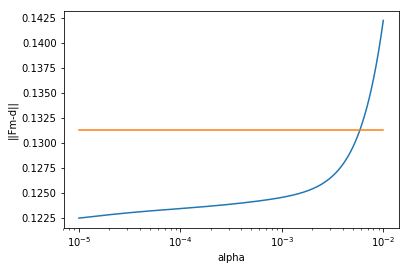

In [48]:
# --- Morozov's Discrepancy criterion
delta = np.linalg.norm(noise)*np.ones_like(misfit)

plt.figure
plt.semilogx(alpha[0:300],misfit[0:300])
plt.semilogx(alpha[0:300],delta[0:300])
plt.xlabel('alpha')
plt.ylabel('||Fm-d||')
plt.show()

The optimal $\alpha$ occurs at roughly 

\begin{equation}
\alpha_{Morozov} \simeq 6 \times 10^{-3}
\end{equation}

## Part (E)

Here I look for the value of $\alpha$ s.t. 

\begin{equation}
\alpha_{L_2} = \min_{\alpha} ||\mathbf{m}_{true} - \mathbf{m}_{tikh} ||_{L_2}
\end{equation}

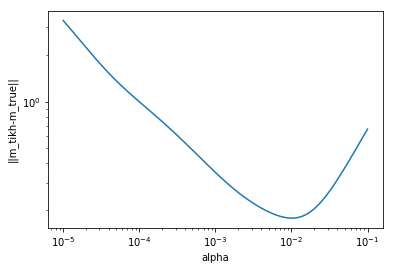

In [49]:
# --- Compute and plot L2 error 
err = np.zeros_like(alpha)

for i in np.arange(alpha.shape[0]):
    err[i] = np.linalg.norm(m_true-m_tikh[i,:])
    
plt.figure
plt.loglog(alpha,err)
plt.xlabel('alpha')
plt.ylabel('||m_tikh-m_true||')
plt.show()

From the above plot it seems like the largest value for $\alpha_{L_2}$ is roughly
\begin{equation}
\alpha_{L_2}\simeq 1 \times 10^{-2}
\end{equation}

Each of the three methods produce roughly similar "optimal" values for $\alpha$. The value computed by minimizing the error to the true solution is not an ideal solution, since this does not allow for prediction. The $\alpha_{L_2}$ is consistently lower than $\alpha_{Morozov}$, which runs the risk of over fitting. The results are of the same order of magnitude, however. 